In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import os

In [3]:
#import excel data sheetwise
data=[]
concs=[]
for i in np.arange(1,8):
    data.append(pd.read_excel('sampledata.xlsx', f'Sheet{i}'))
for i in data:
    concs.append(i.iloc[0][2])

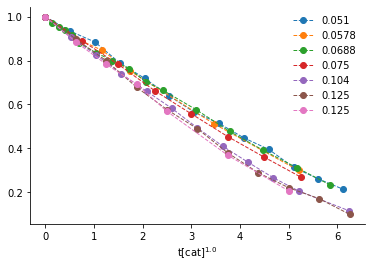

In [4]:
#plot example frame to tweak formatting
order=1
for i,sheet in enumerate(data):
        plt.plot(sheet['t']*concs[i]**order,sheet['c/c0'], linestyle='--',linewidth=1, marker='o', label=f'{concs[i]}')
        plt.legend(frameon=False)
        ax=plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel(f't[cat]$^{{{order:.1f}}}$')
plt.show()

In [5]:
#create GIF!
filenames=[]
orders = np.linspace(0,1,30)
poisons = np.linspace(0,0.015,50)

#create a bunch of plots as pngs to string together
for order in orders:
    for i,sheet in enumerate(data):
        plt.plot(sheet['t']*concs[i]**order,sheet['c/c0'], linestyle='--',linewidth=1, marker='o', label=f'{concs[i]}')
        plt.legend(frameon=False)
        ax=plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel(f't[cat]$^{{{order:.1f}}}$')
    filename = f'{order}.png'
    filenames.append(filename)
    
    # save current frame
    plt.savefig(filename,dpi=200)
    plt.close()
    
#second half of gif ... generate more plots but make sure you keep updating filenmae from where you left off
for poison in poisons:
    for i,sheet in enumerate(data):
        plt.plot(sheet['t']*(concs[i]-poison)**order,sheet['c/c0'], linestyle='--',linewidth=1, marker='o', label=f'{concs[i]}')
        plt.legend(frameon=False)
        ax=plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel(f't([cat]-{poison:.3f})$^{{{order:.1f}}}$')
    filename = f'{order}_{poison}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename,dpi=200) #optional to add transparent=True
    plt.close()

# build gif
with imageio.get_writer('vtna.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)